In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as plt

sns.set_style("ticks")
plt.rcParams.update({"figure.dpi": 300})

In [13]:
# Uncomment the line below if you haven't generated the dataset manually.

!python ./src/generate_mock_data.py 

2024-06-21 15:27:00,944 - INFO - Start data generation...
2024-06-21 15:27:00,944 - INFO - Generating data for BikeTown...
2024-06-21 15:27:01,534 - INFO - Generating data for CycleHub...
2024-06-21 15:27:02,124 - INFO - Generating data for PedalPoint...
2024-06-21 15:27:02,761 - INFO - Generating data for SpinScape...
2024-06-21 15:27:03,259 - INFO - Generating data for GearGrove...
2024-06-21 15:27:03,848 - INFO - Generating data for BikeBreeze...
2024-06-21 15:27:04,391 - INFO - Generating data for VelocityVista...
2024-06-21 15:27:14,544 - INFO - Data generation complete.


In [17]:
availability_df = pd.read_csv("./data/availability_dataset.csv")

availability_df.head(5)

,timestamp,location_name,n_available,predicted,weekday,weekday_name,is_weekend,hour,week
0,2023-06-01 00:00:00,BikeTown,102,100,3,Thursday,False,0,22
1,2023-06-01 00:01:00,BikeTown,102,104,3,Thursday,False,0,22
2,2023-06-01 00:02:00,BikeTown,102,101,3,Thursday,False,0,22
3,2023-06-01 00:03:00,BikeTown,104,108,3,Thursday,False,0,22
4,2023-06-01 00:04:00,BikeTown,102,103,3,Thursday,False,0,22


In [18]:
availability_df.describe()

,n_available,predicted,weekday,hour,week
count,927360.000000,927360.000000,927360.000000,927360.00000,927360.000000
mean,5.775754,5.273246,3.000000,11.50000,28.500000
std,5.419865,6.141049,1.989102,6.92219,3.815018
min,0.000000,-5.000000,0.000000,0.00000,22.000000
25%,2.000000,1.000000,1.000000,5.75000,25.000000
50%,4.000000,4.000000,3.000000,11.50000,28.500000
75%,8.000000,8.000000,5.000000,17.25000,32.000000
max,104.000000,108.000000,6.000000,23.00000,35.000000


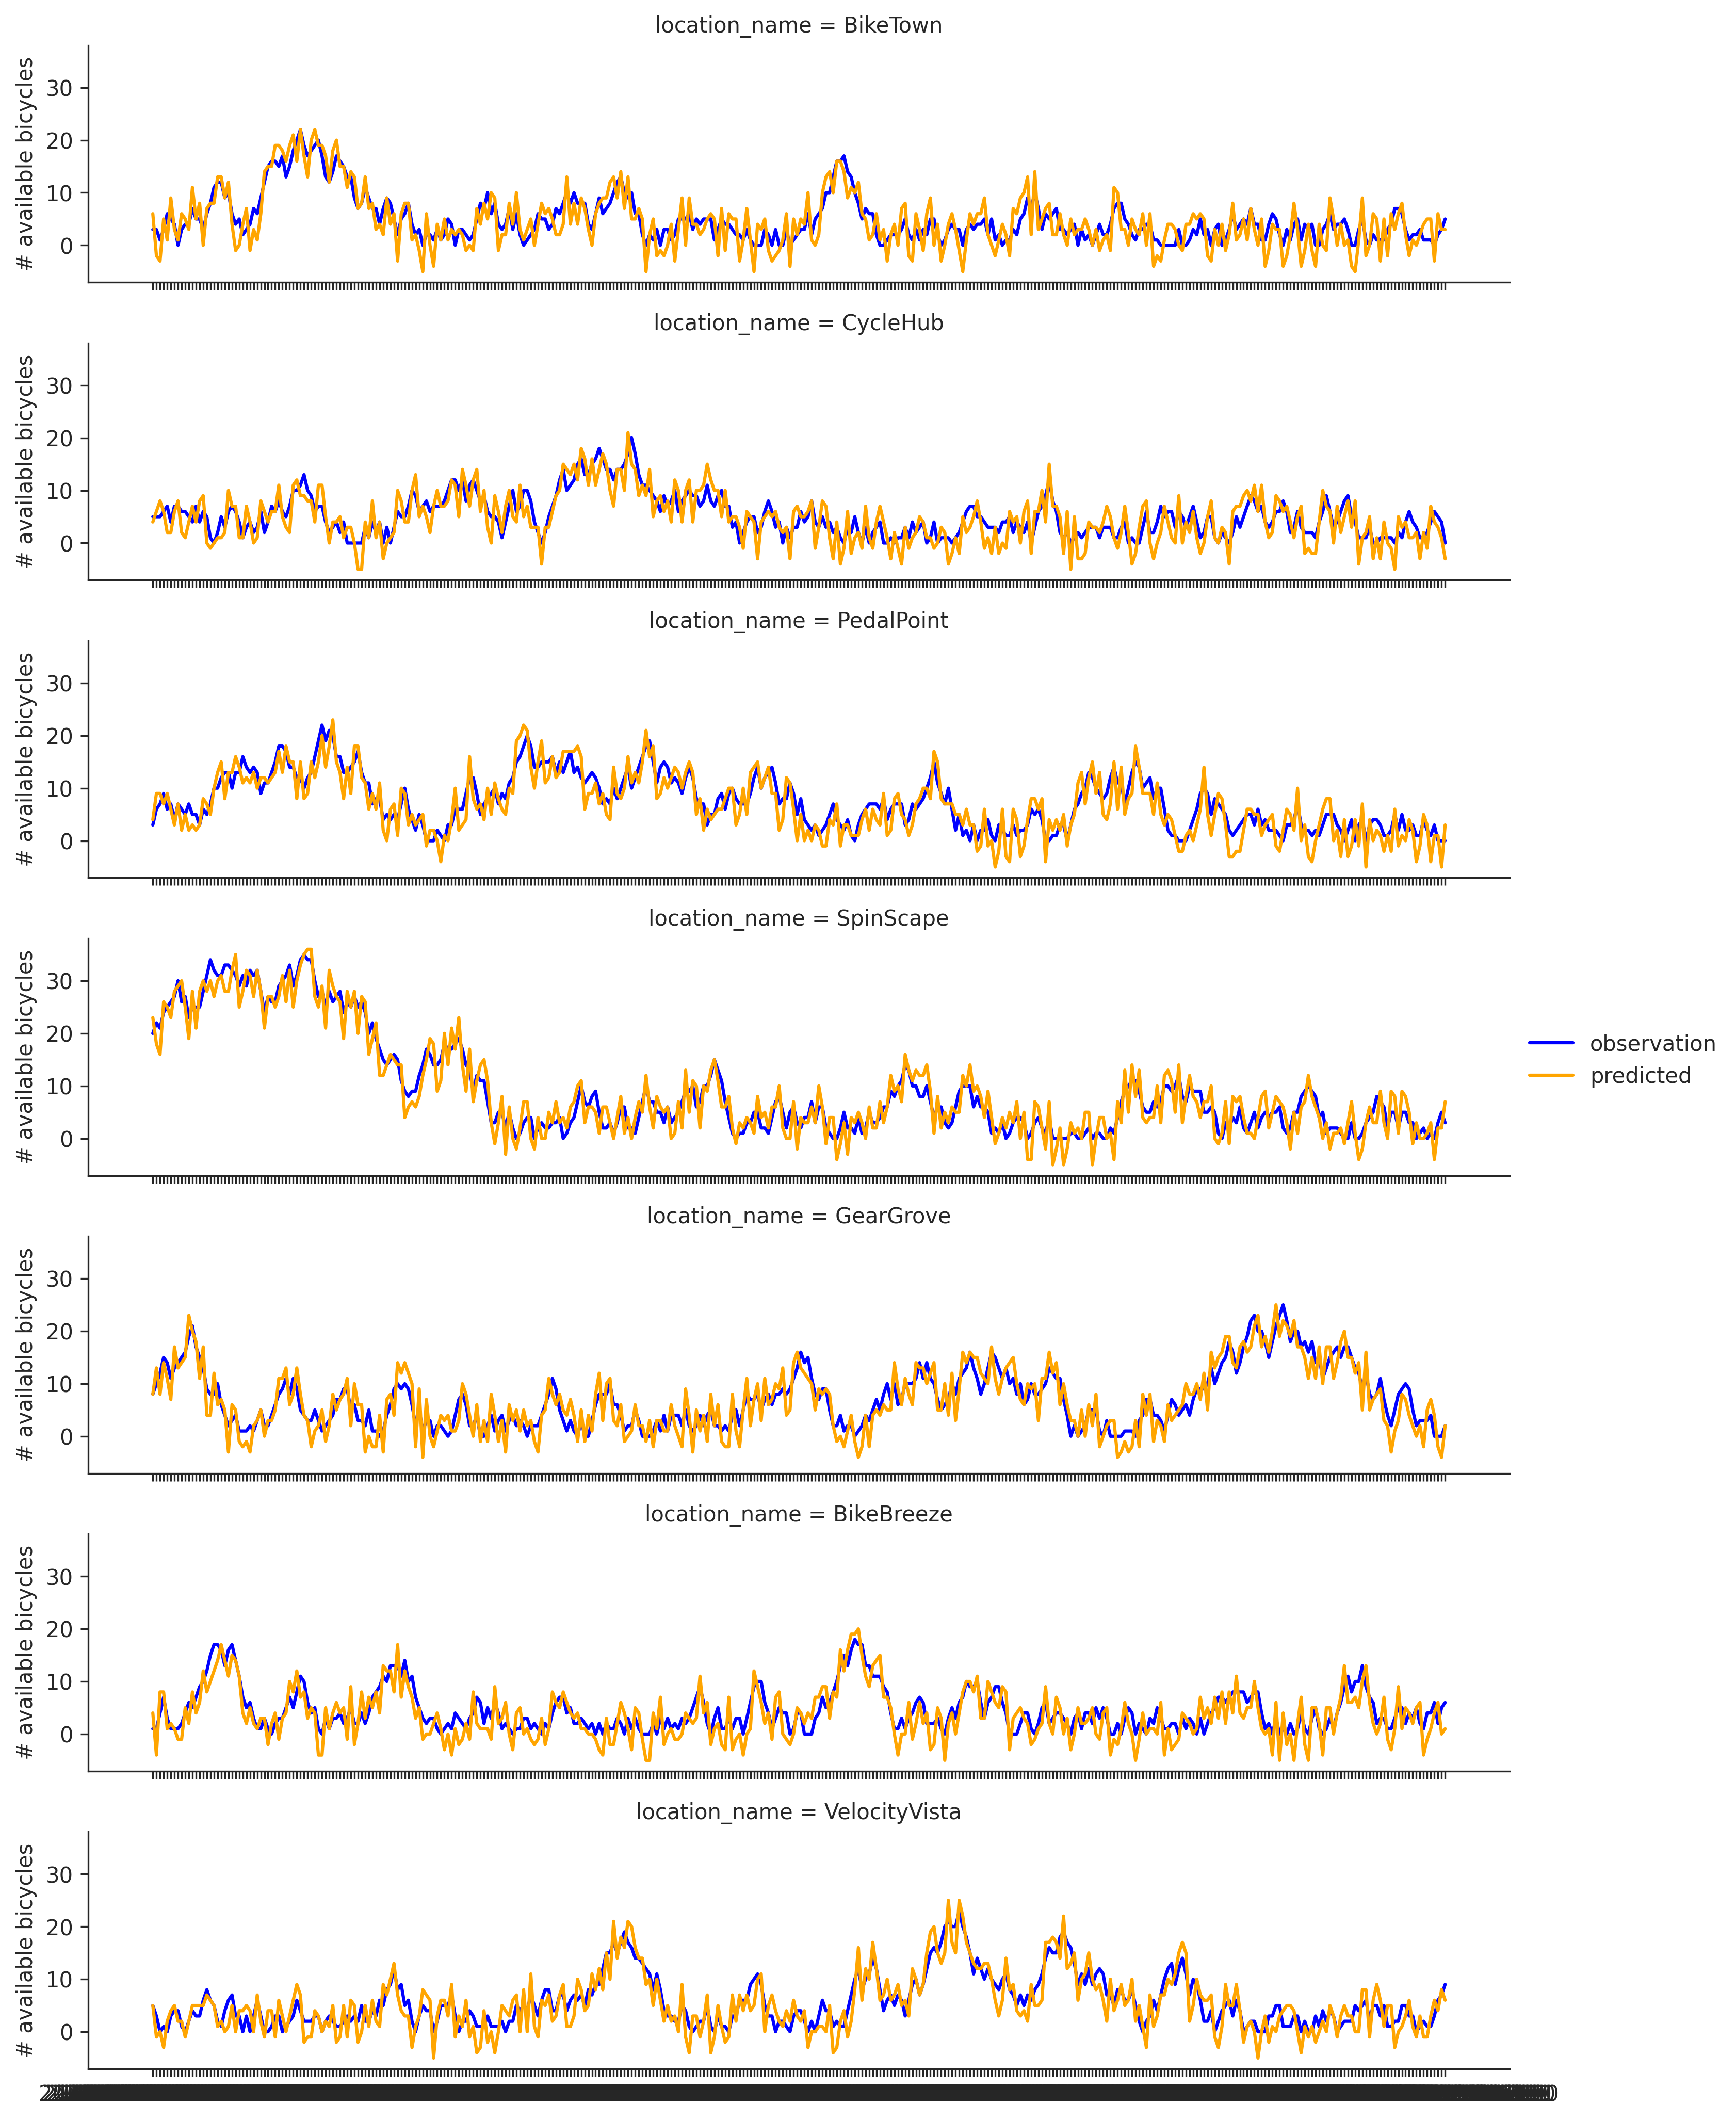

In [19]:
start_dt = "2023-06-04 07:00"
end_dt = "2023-06-04 13:00"

df_to_plot = availability_df[(availability_df["timestamp"]>=start_dt) & (availability_df["timestamp"]<end_dt)]

g = sns.FacetGrid(df_to_plot, row="location_name", aspect=5, height=2)
g.map(sns.lineplot, "timestamp", "n_available", color="blue", label="observation")
g.map(sns.lineplot, "timestamp", "predicted", color="orange", label="predicted")
g.add_legend()
g.set(xlabel="", ylabel="# available bicycles")